In [ ]:
#import matplotlib.image as mpimg
#from google.colab import files
#from IPython.display import Image

#uploaded = files.upload()
#test = Image("C:\Users\azemfack\Pictures\ch.d.yquem.jpg")

#img=mpimg.imread(test)
#imgplot = plt.imshow(test)
#plt.show()

**Fraud in the wine sector(santa-lucia)**

Wine fraud involves the commercial aspects of wine. The most common type of fraud is where wines are adulterated, usually by adding cheaper products (for example juices) and sometimes harmful chemicals and sweeteners (to compensate for color or flavor).
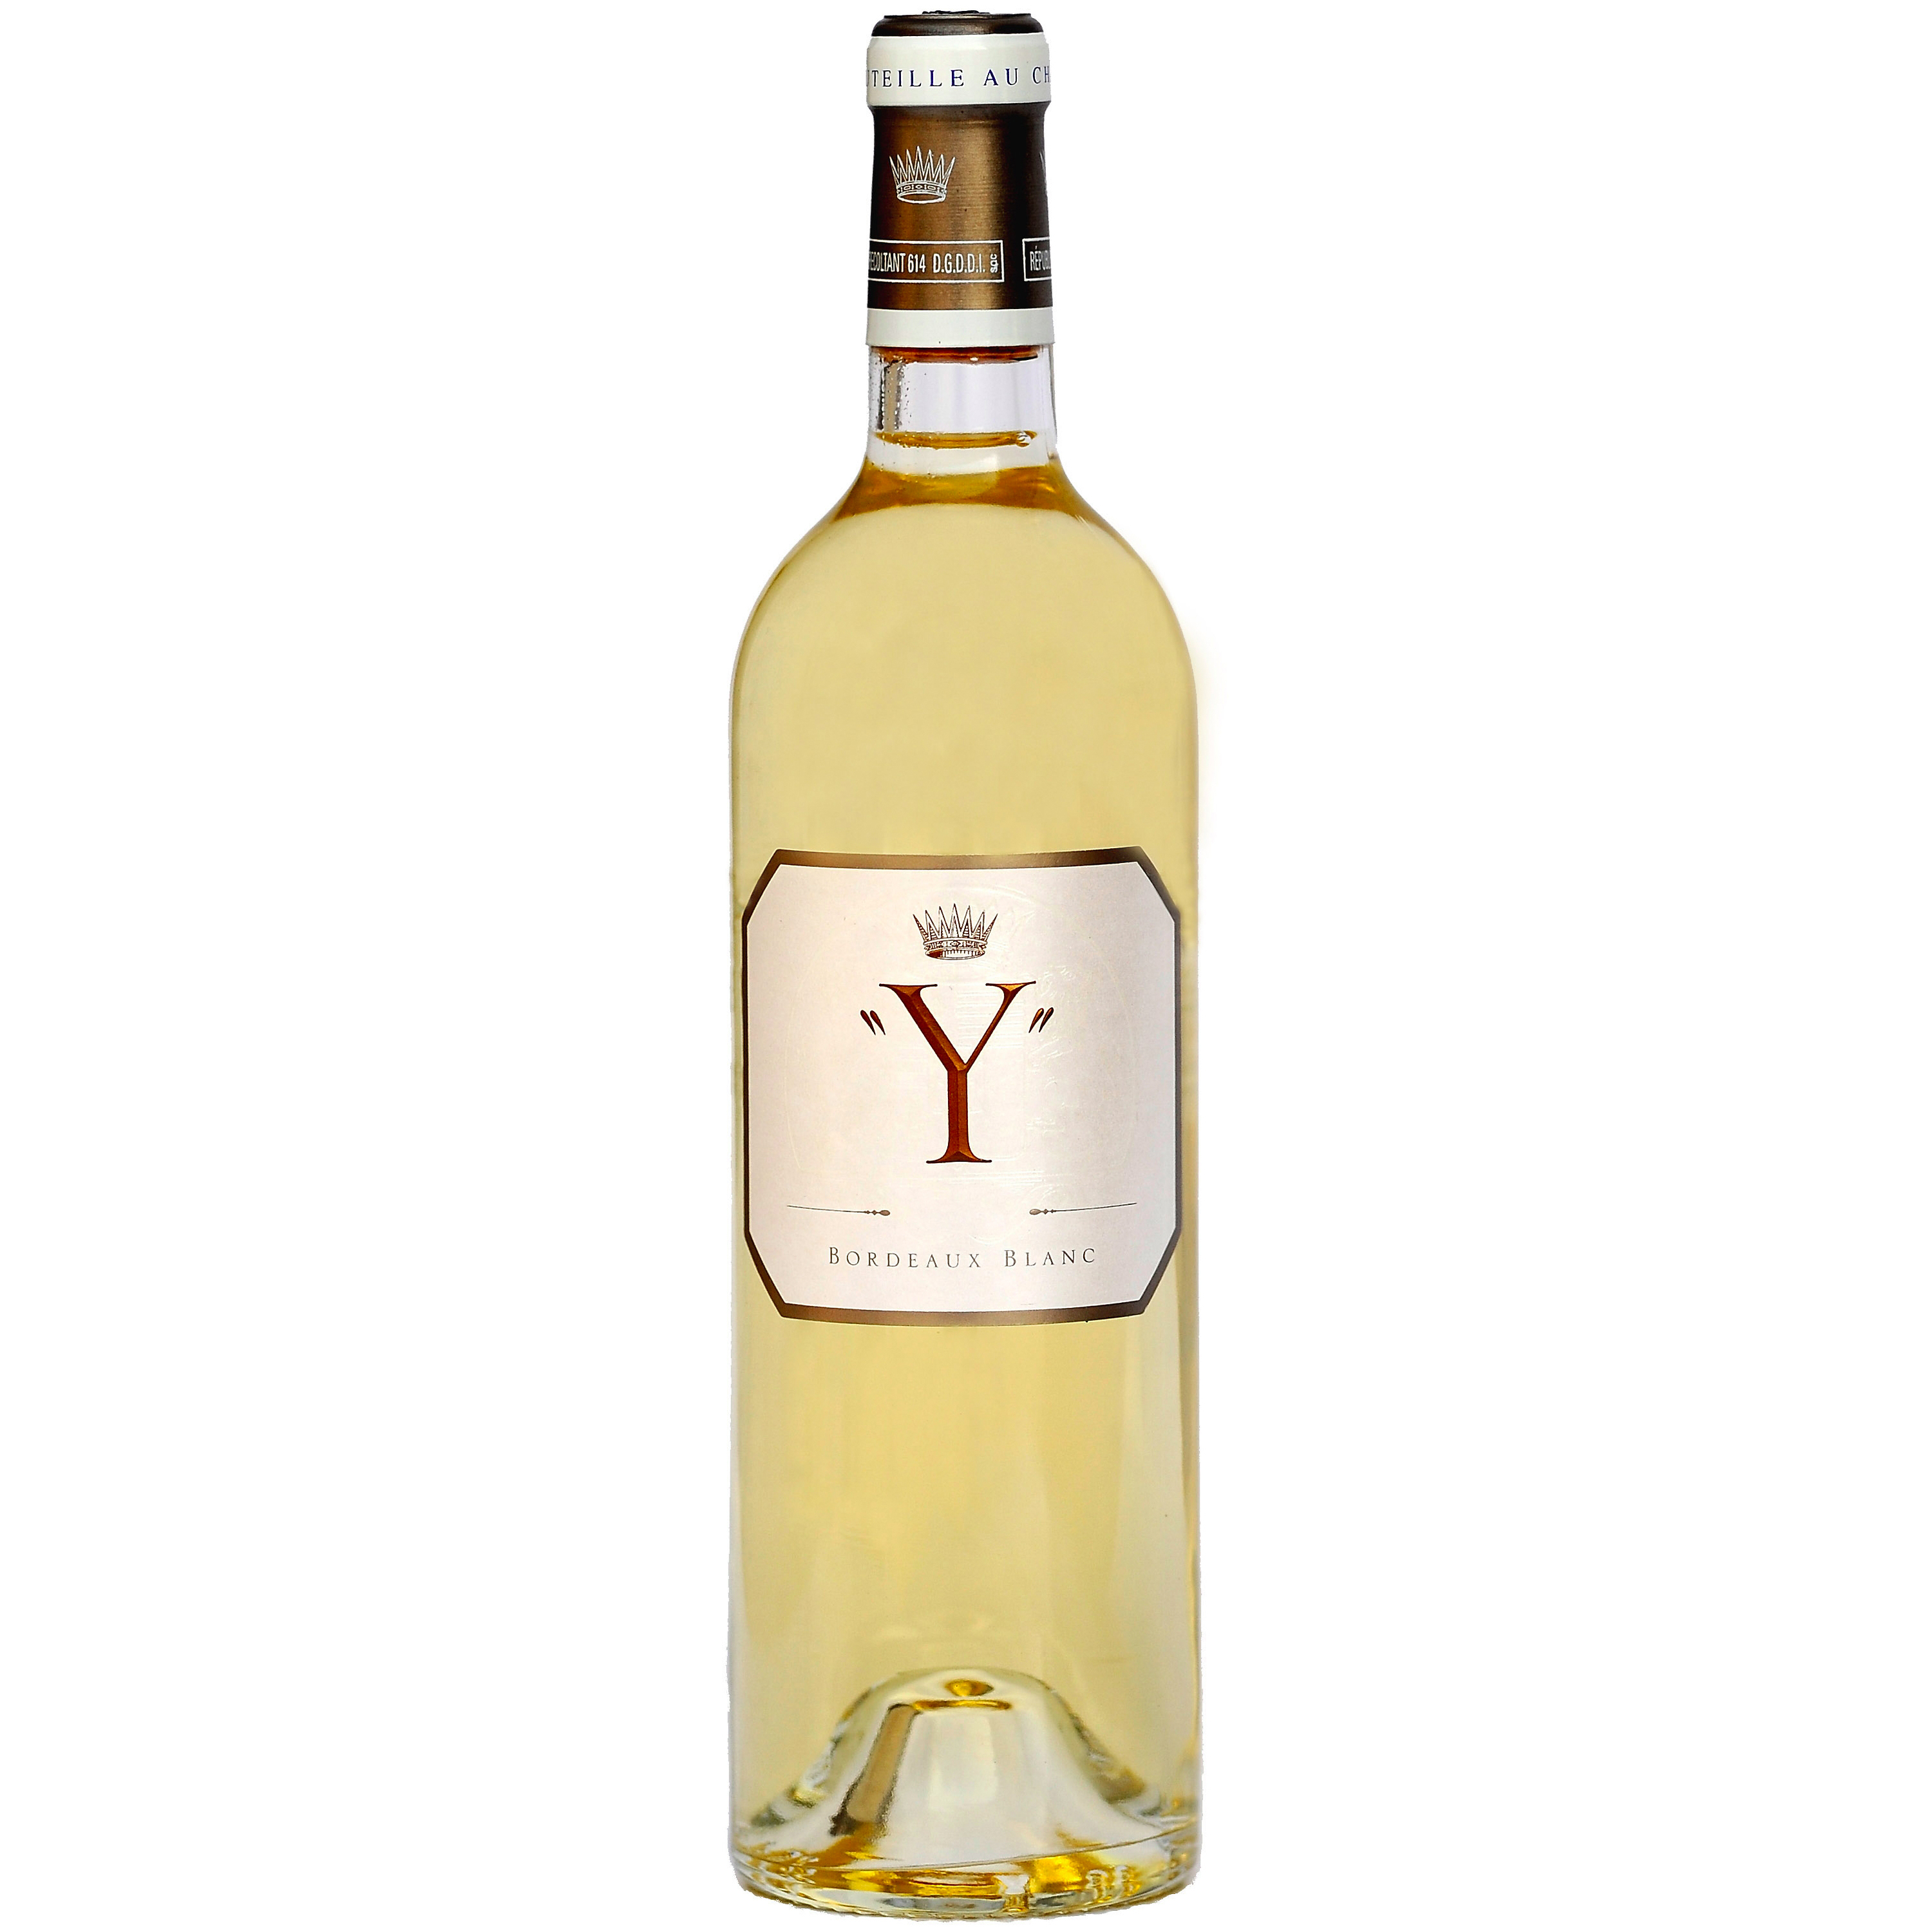
Counterfeiting and label change of inferior and cheaper wines for more expensive brands is another common type of fraud

Fraud in the wine sector(santa-lucia)

Wine fraud involves the commercial aspects of wine. The most common type of fraud is where wines are adulterated, usually by adding cheaper products (for example juices) and sometimes harmful chemicals and sweeteners (to compensate for color or flavor).Fraud in the wine sector(santa-lucia)

Wine fraud involves the commercial aspects of wine. The most common type of fraud is where wines are adulterated, usually by adding cheaper products (for example juices) and sometimes harmful chemicals and sweeteners (to compensate for color or flavor).

**project objectives**
according to the audit of various wine samples using chemical analysis on samples. a quality wine supplier has been the victim of fraud by another supplier who passes cheap and low quality wines for superior quality wines. The distribution company hired you to try and create a machine learning model that can help detect poor quality wine samples (aka "fraud"). She wants to know if it is even possible to detect such a difference.
Data source: lab analyst(kenfack freshnel).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

In [ ]:
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/wine_fraud.csv'
df = pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [ ]:
#DATA EXPLORATION
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

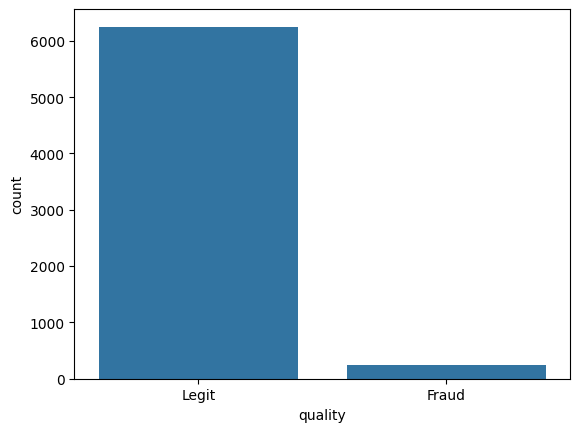

In [ ]:
sns.countplot(x='quality',data=df);

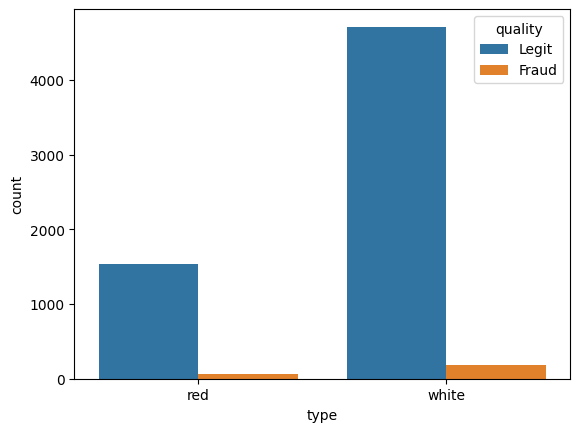

In [ ]:
#CERCHIAMO A CAPIRE SE ESISTE UNA DIFFERENZA TRA VINO ROSSO E BIANCO PER QUANTO RIGUARDA IL CONTROFATTO
#COSTRUIRE UN COUNTPLOT CHE CI FA VEDERE IL CONTROFATTO IN RED AND WHITE
sns.countplot(x='type',hue='quality',data=df);

In [ ]:
#CHE QUANTITA DEL VINO E' STATO CONTROFATTO(red|white) in %
reds = df[df["type"]=='red']
whites = df[df["type"]=='white']

In [ ]:
print("% del vino rosso:")
print(100* (len(reds[reds['quality']=='Fraud'])/len(reds)))

% del vino rosso:
3.9399624765478425


In [ ]:
print("% del vino bianco:")
print(100* (len(whites[whites['quality']=='Fraud'])/len(whites)))

% del vino bianco:
3.7362188648427925


In [ ]:
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})
df.corr()['Fraud']

<ipython-input-11-ac57fe066d78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Fraud']


fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

<ipython-input-12-75c66bf20f75>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Fraud'][:-1].sort_values().plot(kind='bar');


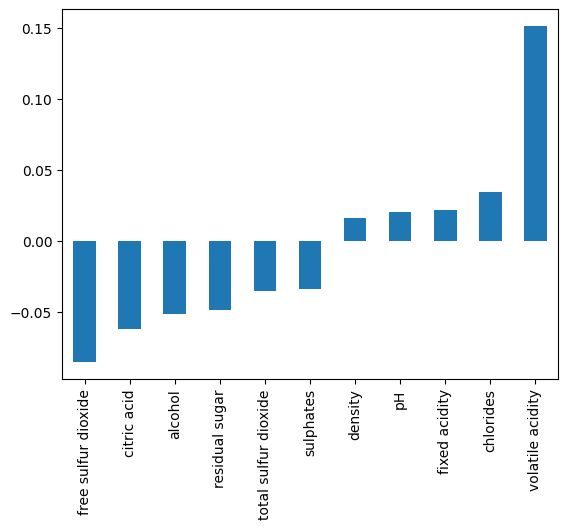

In [ ]:
#diagramma in bar con valore della correlazione
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar');

In [ ]:
#albero per osservare le relazioni tra variabili(cluster=raggruppamento)

<ipython-input-13-2a21b640cb52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(),cmap='viridis');


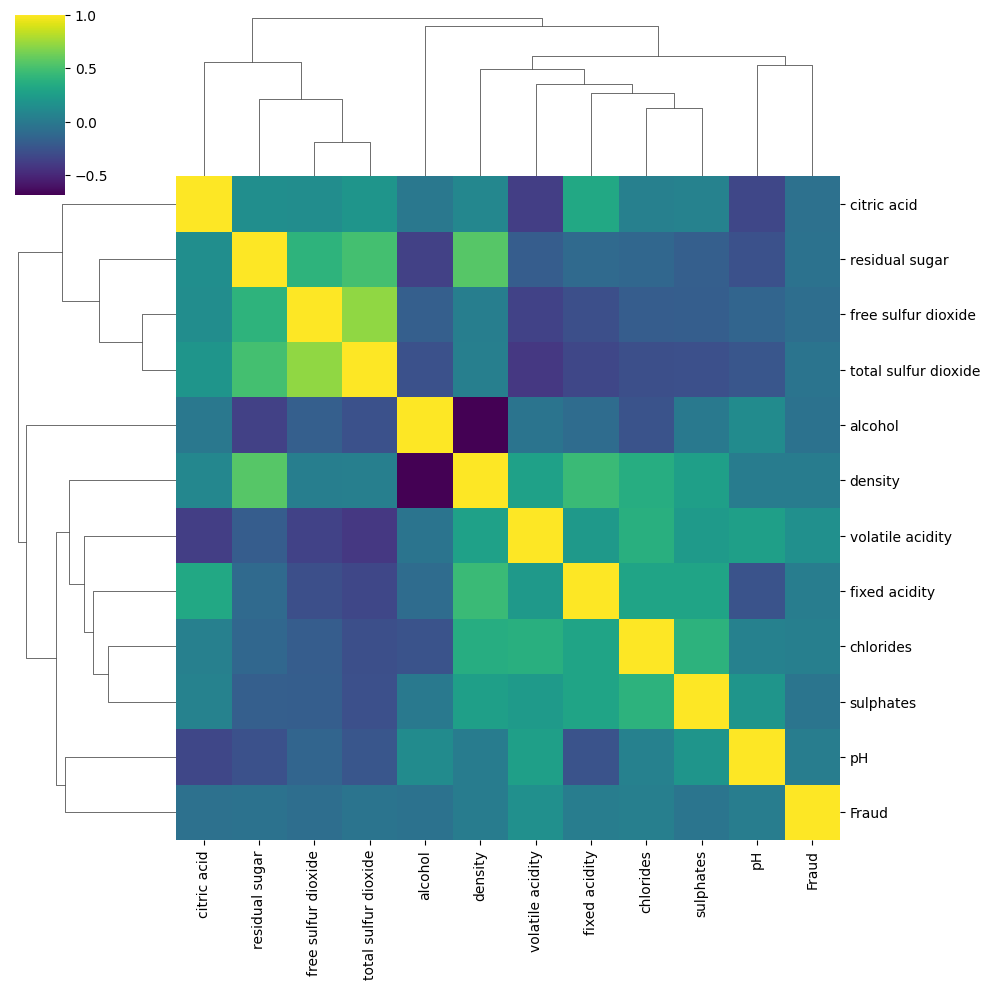

In [ ]:
sns.clustermap(df.corr(),cmap='viridis');

In [ ]:
#Machine Learning model

In [ ]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)
df = df.drop('Fraud',axis=1)

In [ ]:
#split data
X = df.drop('quality',axis=1)
y = df['quality']

In [ ]:
#training (test|train split)&scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')

In [ ]:
#parametrs
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)



In [ ]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [ ]:
#MATRICE DI CONFUSIONE ET resultato del model

In [ ]:
grid_pred = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test,grid_pred)

array([[ 17,  10],
       [ 92, 531]])

In [ ]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



by AZEMFACK PAGES